In [1]:
# Lets integrate f(x) = x^2 from 0 to 2

import numpy as np
from scipy import integrate

# Example: Integrate f(x) = x^2 from 0 to 2
f = lambda x: x**2
result, error = integrate.quad(f, 0, 2)

print(f"Integral result: {result:.4f}, Estimated error: {error:.4e}")


Integral result: 2.6667, Estimated error: 2.9606e-14


## APPLICATION1: Vehicle Distance from Speed Data

We can calculate the total distance traveled by a vehicle from its speed vs. time data using numerical integration. 

The total distance $s$ is given by:

$$
s = \int_{0}^{T} v(t) \, dt
$$

where:
- $v(t)$ is the speed (in km/h)
- $T$ is the total time (in hours)

![CAR](images/car.png)

**In real-world, you numerically integrate speed samples from sensors.**

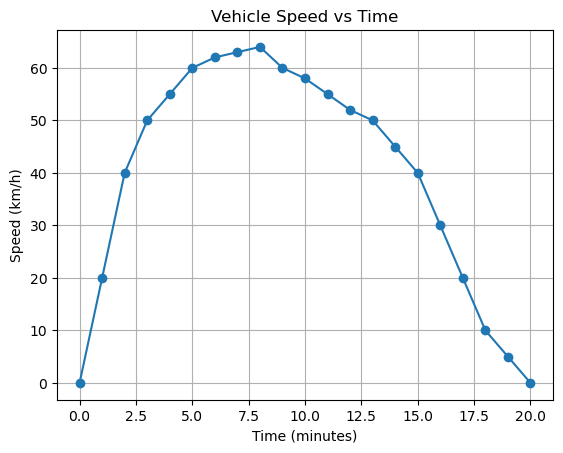

Total distance (Trapezoidal Rule): 13.98 km
Total distance (Simpson's Rule):   14.02 km


C:\Users\UCT\AppData\Local\Temp\ipykernel_15712\1151529681.py:33: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  distance_simps = simps(speed_kmph, time_hours)      # km


In [2]:
# version1: Calculating distance from speed, where spped data is collected from sensors
# Numerical Integration Example
# Vehicle Distance from Speed Data


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Suppose you measured speed every minute for 20 minutes
# Units: v in km/h
time_minutes = np.arange(0, 21)    # 0 to 20 minutes, every minute
time_hours = time_minutes / 60.0   # convert to hours

# Following speed data was measured by sensors every minute for 20 minutes (some typical speed profile)
speed_kmph = np.array([0, 20, 40, 50, 55, 60, 62, 63, 64, 60, 
                       58, 55, 52, 50, 45, 40, 30, 20, 10, 5, 0])

# Plot speed profile
plt.plot(time_minutes, speed_kmph, marker='o')
plt.xlabel('Time (minutes)')
plt.ylabel('Speed (km/h)')
plt.title('Vehicle Speed vs Time')
plt.grid(True)
plt.show()

# ---------------------------
# 1️ Trapezoidal Rule
distance_trapz = np.trapz(speed_kmph, time_hours)   # km
print(f'Total distance (Trapezoidal Rule): {distance_trapz:.2f} km')

# 2️ Simpson's Rule
distance_simps = simps(speed_kmph, time_hours)      # km
print(f'Total distance (Simpson\'s Rule):   {distance_simps:.2f} km')


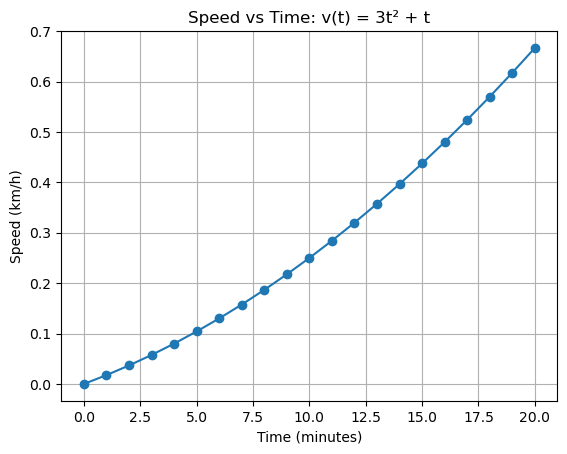

Total distance (Trapezoidal Rule): 0.09 km
Total distance (Simpson's Rule):   0.09 km


C:\Users\UCT\AppData\Local\Temp\ipykernel_15712\2484987208.py:35: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  distance_simps = simps(speed_kmph, time_hours)      # km


In [3]:
# version2: Calculating distance from speed, where speed is given as analytical function: v(t) = 3*t^2 + t, with t in minutes

# Numerical Integration Example
# Vehicle Distance from Analytical Speed Function

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Time: from 0 to 20 minutes, sampled every minute
time_minutes = np.arange(0, 21)     # 0 to 20 inclusive
time_hours = time_minutes / 60.0    # convert minutes to hours

# Speed function: v(t) = 3*t^2 + t, with t in minutes
# First convert minutes to hours inside v(t)
# So, v(t) = 3*(t_min/60)^2 + (t_min/60) gives speed in km/h

# Define speed analytically
speed_kmph = 3 * (time_hours)**2 + time_hours

# Plot speed profile
plt.plot(time_minutes, speed_kmph, marker='o')
plt.xlabel('Time (minutes)')
plt.ylabel('Speed (km/h)')
plt.title('Speed vs Time: v(t) = 3t² + t')
plt.grid(True)
plt.show()

# ---------------------------
# 1️ Trapezoidal Rule
distance_trapz = np.trapz(speed_kmph, time_hours)   # km
print(f'Total distance (Trapezoidal Rule): {distance_trapz:.2f} km')

# 2️ Simpson's Rule
distance_simps = simps(speed_kmph, time_hours)      # km
print(f'Total distance (Simpson\'s Rule):   {distance_simps:.2f} km')


## APPLICATION2: Flow Rate — Total Volume Calculation
Field: Mechanical / Civil / Environmental Engineering

Example: Suppose you have a flow rate Q(t) measured over time — e.g., the flow rate of water in a pipe. You want to find total volume that passed through the pipe over time

The total volume $V$ is given by the integral of the flow rate $Q(t)$:

$$
V = \int_{0}^{T} Q(t) \, dt
$$

 ![CAR](images/pipe.png)


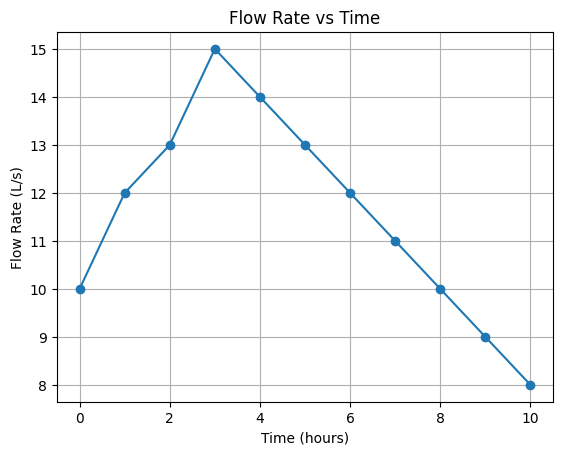

Total volume (Trapezoidal Rule): 424.80 cubic meters
Total volume (Simpson's Rule):   427.20 cubic meters


C:\Users\hi\AppData\Local\Temp\ipykernel_13844\3025508119.py:31: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  volume_simps = simps(Q, time_seconds)      # gives volume in liters


In [3]:
# The flow rate was measured using sensory data

# Simple Numerical Integration Example
# Flow Rate -> Total Volume Calculation.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Suppose you measured flow rate every hour for 10 hours
# Units: Q in liters per second (L/s)
time_hours = np.arange(0, 10 + 1)   # 0 to 10 hours, at 1-hour intervals
time_seconds = time_hours * 3600    # convert to seconds

# This is what the Q, flow rate was measured at each hour. Total 11 observations
Q = np.array([10, 12, 13, 15, 14, 13, 12, 11, 10, 9, 8])  # L/s

# Plot flow rate
plt.plot(time_hours, Q, marker='o')

plt.xlabel('Time (hours)')
plt.ylabel('Flow Rate (L/s)')
plt.title('Flow Rate vs Time')
plt.grid(True)

plt.show()

# ---------------------------
# 1️ Trapezoidal Rule
volume_trapz = np.trapz(Q, time_seconds)   # gives volume in liters
print(f'Total volume (Trapezoidal Rule): {volume_trapz/1000:.2f} cubic meters')

# 2️ Simpson's Rule
volume_simps = simps(Q, time_seconds)      # gives volume in liters
print(f'Total volume (Simpson\'s Rule):   {volume_simps/1000:.2f} cubic meters')


## APPLICATION3: Battery Discharge — Total Energy Delivered

To find the total energy delivered by a battery, you integrate the power over time:

Power is:
$$
P(t) = V(t) \times I(t)
$$

So the total energy is:
$$
E = \int_{0}^{T} P(t) \, dt = \int_{0}^{T} V(t) \times I(t) \, dt
$$

This example uses numerical integration (Trapezoidal and Simpson's Rule) to compute total energy in Wh or Joules.

**You typically have measurements every second or minute — so you numerically integrate the power to find the total energy.**

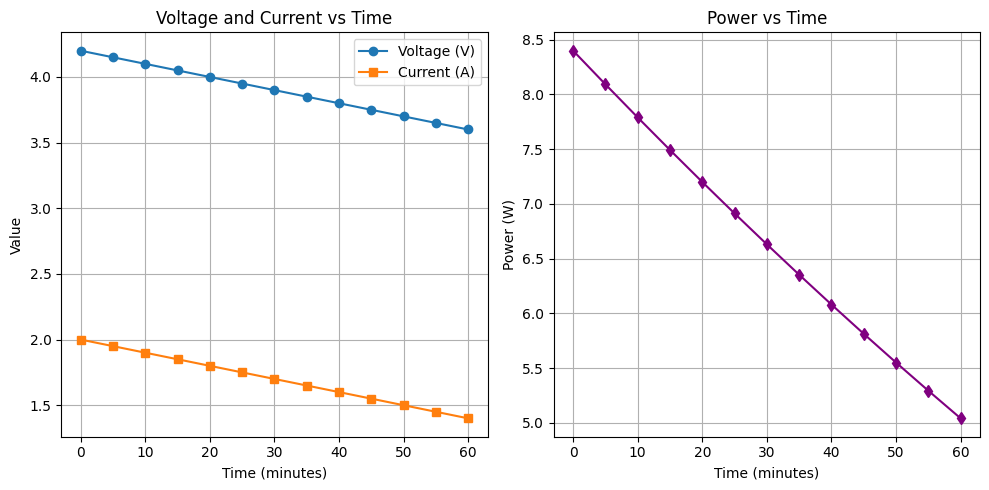

Total energy delivered (Trapezoidal): 6.66 Wh, or 23977.50 Joules
Total energy delivered (Simpson's):   6.66 Wh, or 23976.00 Joules


C:\Users\hi\AppData\Local\Temp\ipykernel_13844\2719783354.py:56: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  energy_Wh_simps = simps(power, time_hours)
C:\Users\hi\AppData\Local\Temp\ipykernel_13844\2719783354.py:57: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  energy_J_simps = simps(power, time_seconds)


In [7]:
# -------------------------------------------------
# Numerical Integration Example
# Battery Discharge -> Total Energy Delivered
# -------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Suppose you measured voltage and current every 5 minutes for 1 hour
# Units: Voltage (V), Current (A)
time_minutes = np.arange(0, 65, 5)    # 0 to 60 minutes, every 5 min
time_hours = time_minutes / 60.0      # convert to hours
time_seconds = time_minutes * 60.0    # or convert to seconds for Joules

# We measured following battery voltage profile (dropping slightly over time)
voltage = np.array([4.2, 4.15, 4.1, 4.05, 4.0, 3.95, 3.9, 3.85, 3.8, 3.75, 3.7, 3.65, 3.6])

# We measured following discharge current (varies)
current = np.array([2.0, 1.95, 1.9, 1.85, 1.8, 1.75, 1.7, 1.65, 1.6, 1.55, 1.5, 1.45, 1.4])

# Compute power at each time point (W)
power = voltage * current  # Watts

# Plot voltage, current, and power
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)

plt.plot(time_minutes, voltage, 'o-', label='Voltage (V)')
plt.plot(time_minutes, current, 's-', label='Current (A)')

plt.xlabel('Time (minutes)')
plt.ylabel('Value')
plt.title('Voltage and Current vs Time')
plt.legend()
plt.grid(True)

###########################################################

plt.subplot(1, 2, 2)
plt.plot(time_minutes, power, 'd-', color='purple')
plt.xlabel('Time (minutes)')
plt.ylabel('Power (W)')
plt.title('Power vs Time')
plt.grid(True)

plt.tight_layout()
plt.show()

# ---------------------------
# 1️ Trapezoidal Rule
# Energy in Watt-hours:
energy_Wh_trapz = np.trapz(power, time_hours)
energy_J_trapz = np.trapz(power, time_seconds)# or Energy in Joules:
print(f'Total energy delivered (Trapezoidal): {energy_Wh_trapz:.2f} Wh, or {energy_J_trapz:.2f} Joules')

# 2️ Simpson's Rule
energy_Wh_simps = simps(power, time_hours)
energy_J_simps = simps(power, time_seconds)# or Energy in Joules:
print(f'Total energy delivered (Simpson\'s):   {energy_Wh_simps:.2f} Wh, or {energy_J_simps:.2f} Joules')
